<a href="https://colab.research.google.com/github/ousdiallo/Projet-ML/blob/main/Labo_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Groupe 11:

Ousmane Diallo et
Hermann Some

# La pratique de la Régression

L’objectif  de  ce  projet  est  de  travailler  sur  le  jeu  de  données  (modiﬁées) The  Boston Housing Dataset aﬁn de prédire le prix d’un appartement. Une description du jeu de données 
initial  est  disponible  [ici](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)  Pour  ce  projet,  nous  modiﬁons  ce  dernier  en  rajoutant  variables 
indépendantes. Les données, sur lesquels nous travaillerons, sont disponible [ici](https://drive.google.com/drive/folders/1rj7Y9xn3JF5q3cRFjVoxOrQCm3F_PPUX?usp=sharing). 
Il s’agira en particulier de mettre en œuvre, avec Python, et de comparer les performances 
de ces trois méthodes Statistiques : 

   1.  la régression linéaire multiple ; 

   2.  la méthode de sélection de variable pas-à-pas descendante ; 

   3.  la régression Ridge ; 

   4. la régression LASSO. 

## Importation des librairies

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd


# Import Dependencies
%matplotlib inline

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Machine Learning
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
import statsmodels.api as sm

# Normalisation
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importation des données

In [2]:
# Importation de la base de données

data = pd.read_csv('Boston_Data.csv')
data.head()

,Unnamed: 0,R1,R2,R3,R4,R5,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,0,-0.21,0.11,-0.65,-0.54,1.48,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.08,-0.61,-0.85,-0.36,-0.12,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,-1.32,0.95,-0.75,-0.99,-0.36,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.23,-0.10,-0.43,1.58,0.00,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,-1.67,1.49,0.41,0.63,-0.87,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df = data.drop("Unnamed: 0", axis=1)
df.head()

,R1,R2,R3,R4,R5,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,-0.21,0.11,-0.65,-0.54,1.48,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.08,-0.61,-0.85,-0.36,-0.12,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,-1.32,0.95,-0.75,-0.99,-0.36,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.23,-0.10,-0.43,1.58,0.00,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,-1.67,1.49,0.41,0.63,-0.87,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## EDA

In [4]:
# Séparation des données en Appratissage et Test

X = df.drop("Y", axis = 1)
y = df.Y

print(X.shape, y.shape)

(506, 18) (506,)


In [ ]:
X.describe()

,R1,R2,R3,R4,R5,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,-0.007826,-0.000613,-0.026858,-0.002154,-0.037372,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,0.953537,0.970349,0.953501,1.038352,1.042602,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,-2.910000,-2.290000,-2.710000,-3.190000,-2.660000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,-0.597500,-0.680000,-0.617500,-0.770000,-0.807500,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.015000,-0.025000,0.005000,0.000000,-0.090000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,0.670000,0.650000,0.590000,0.697500,0.687500,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,2.380000,3.180000,2.460000,2.930000,3.890000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


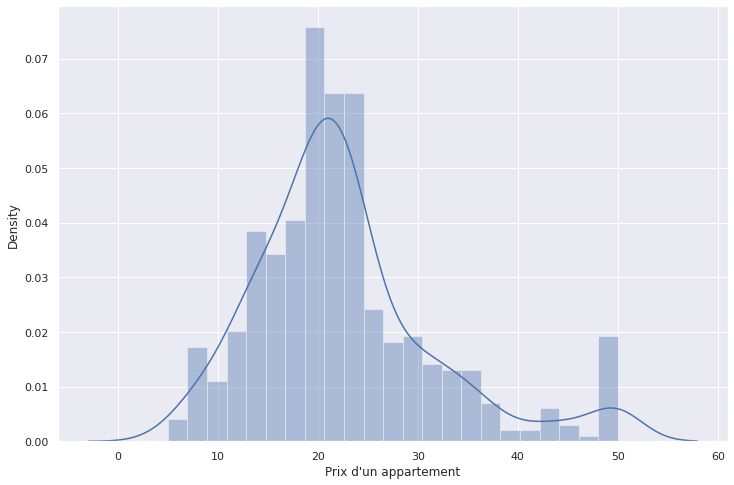

In [5]:
# Appercu de la variable Y (Prix d' un appartement)
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(y)
plt.xlabel("Prix d'un appartement")
plt.show()

## 1. La régression linéaire multiple

Le modèle de régression linéaire est utilisé pour étudier la relation entre une variable dépendante et une ou plusieurs variables indépendantes. La forme générique du modèle de régression linéaire est:
y=x1β1 + x2β2 +..+ xKβK + ε
où y est la variable dépendante ou expliquée et x1, .., xK sont les variables explicatives ou indépendantes.

Disposant d’un échantillon de taille n,  nous cherchons les paramètres estimés  â = (â0, â1, …, âp) qui minimise l’erreur  quadratique moyenne (MSE : mean  squared error).


Les résultats obtenus avec le modèle linéaire sont valides si les hypothèses qui ont été faites le sont :
1. E(Y ) = Xθ qui est équivalent à E(E) = 0,
2. V(Ei) = σ2, ∀i = 1, n,
3. les variables aléatoires Ei sont indépendantes,
4. Ei ∼ N (0, σ2), ∀i = 1, n.


### Normalisation des données

In [56]:
# Construction des échantillons Appratissage et Test

X_train_i, X_test_i, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [57]:
# Centrer et réduire les données sur les paramètres de la moyenne et de la variance de X_train
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_i)
X_test = scaler.transform(X_test_i)

X_train.shape, X_test.shape

((379, 18), (127, 18))

## Apprentissage et Prédiction

In [86]:
# Apprentissage et prédiction
model = linear_model.LinearRegression()
trained_model = model.fit(X_train, y_train)

In [87]:
# Vérification des coéficients de régression

trained_model.coef_, trained_model.intercept_

(array([ 0.2121433 , -0.24143259, -0.03389776,  0.35166886, -0.31447542,
        -1.00442227,  0.76544361,  0.37946261,  0.6948808 , -1.97764592,
         3.20934494, -0.22682162, -2.97697421,  2.138986  , -1.60190472,
        -2.10399132,  1.17667072, -3.61235447]), 22.90791556728232)

In [108]:
# Prédiction

from sklearn.metrics import r2_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#R2_train = model.score(X_train, y_train)
#R2_test = model.score(X_test, y_test)

R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)


RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

model_perf = {"Data": ['train', 'test'], 'R2': [R2_train, R2_test], 'RMSE': [RMSE_train, RMSE_test]}
model_perf = pd.DataFrame(model_perf, columns=["Data", "R2", "RMSE"])
model_perf

,Data,R2,RMSE
0,train,0.751239,4.696865
1,test,0.680755,4.728196


In [14]:
# Calcul des résidus

residual = pd.DataFrame(np.c_[y_train, y_pred_train], columns = ["Value", "Predicted"])
residual["Residues"] = abs(residual["Value"]) - abs(residual["Predicted"])
residual

,Value,Predicted,Residues
0,37.9,33.430811,4.469189
1,15.6,19.336844,-3.736844
2,45.4,38.986750,6.413250
3,15.7,15.321788,0.378212
4,22.6,25.314391,-2.714391
...,...,...,...
374,19.5,16.851776,2.648224
375,21.1,22.064758,-0.964758
376,24.5,26.920105,-2.420105
377,13.4,12.991963,0.408037


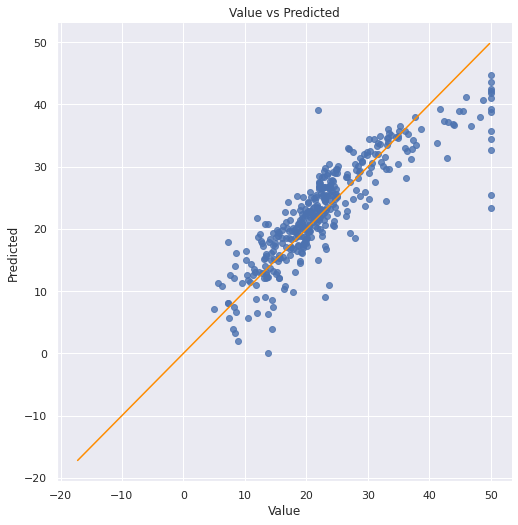

In [ ]:
# graphique Value vs predicted 
sns.lmplot(x='Value', y='Predicted', data=residual, fit_reg=False, height=7)  

# Tracage de la ligne diagonal
line_coords = np.arange(residual.min().min(), residual.max().max())
plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='-')
plt.title('Value vs Predicted')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


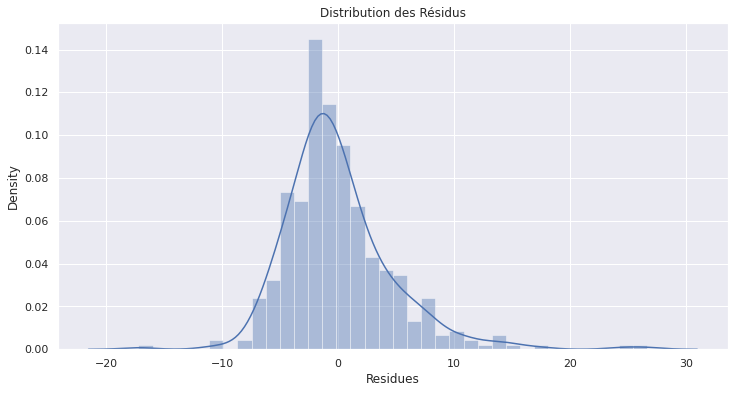

In [ ]:
# Distribution des résidus
plt.subplots(figsize=(12, 6))
plt.title('Distribution des Résidus')
sns.distplot(residual['Residues'])

## Test de la normalité de la distribution des résidus

In [ ]:
from scipy.stats import shapiro, normaltest
# test de normalité
stat, p = shapiro(residual["Residues"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
# interpretation
alpha = 0.05
if p < alpha:
	print('Residu semble Gaussien (On occepte H0)')
else:
	print('Residu non Gaussien (On rejette H0)')

Statistics=0.909, p-value=0.000
Residu semble Gaussien (On occepte H0)


## 2.  la méthode de sélection de variable pas-à-pas descendante 

### StatModels

In [115]:
X_train.shape, X_test.shape

((379, 18), (127, 18))

In [116]:
#Base de données à utiliser
X_train_st = pd.DataFrame(X_train,columns=X_train_i.columns)
X_train_st.insert(0, "intercept", np.ones(379),True)
X_train_st.shape

(379, 19)

In [117]:
X_test_st = pd.DataFrame(X_test,columns=X_train_i.columns)
X_test_st.insert(0, "intercept", np.ones(127),True)
X_test_st.shape

(127, 19)

In [118]:
import statsmodels.api as sm

#Modèle initial avec toutes les variables
model_sm = sm.OLS(y_train, X_train_i).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              502.5
Date:                Wed, 03 Mar 2021   Prob (F-statistic):                   6.68e-243
Time:                        22:54:31   Log-Likelihood:                         -1136.4
No. Observations:                 379   AIC:                                      2309.
Df Residuals:                     361   BIC:                                      2380.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
R1             0.1240      0.271      0.457      0.648      -0.410       0.658
R2            -0.2629      0.274     -0.959      0.338      -0.802       0.276
R3            -0.1391      0.271     -0.514      0.607      -0.671       0.393
R4             0.3977      0.256      1.553      0.121      -0.106       0.901
R5            -0.3788      0.250     -1.517      0.130      -0.870       0.112
X1            -0.1102      0.041     -2.680      0.008      -0.191      -0.029
X2             0.0376      0.017      2.165      0.031       0.003       0.072
X3             0.0519      0.072      0.718      0.473      -0.090       0.194
X4             2.5044      1.021      2.454      0.015       0.497       4.512
X5            -4.9249      3.883     -1.268      0.206     -12.561       2.712
X6             6.1414      0.359     17.121      0.000       5.436       6.847
X7            -0.0126      0.016     -0.786      0.432      -0.044       0.019
X8            -0.9824      0.230     -4.278      0.000      -1.434      -0.531
X9             0.1289      0.078      1.660      0.098      -0.024       0.282
X10           -0.0070      0.004     -1.554      0.121      -0.016       0.002
X11           -0.4869      0.124     -3.913      0.000      -0.732      -0.242
X12            0.0178      0.003      5.604      0.000       0.012       0.024
X13           -0.4276      0.058     -7.390      0.000      -0.541      -0.314
==============================================================================
Omnibus:                      143.415   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              922.465
Skew:                           1.451   Prob(JB):                    4.89e-201
Kurtosis:                      10.071   Cond. No.                     8.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
## Suppression
useless_col = ["R1", "R2", "R3", "R4", "R5", "X3", "X5", "X9", "X10"]
X_train_sm = X_train_i.drop(useless_col, axis=1)
model_sm_f = sm.OLS(y_train, X_train_sm).fit()
model_sm_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              997.7
Date:                Wed, 03 Mar 2021   Prob (F-statistic):                   2.23e-253
Time:                        22:54:32   Log-Likelihood:                         -1142.2
No. Observations:                 379   AIC:                                      2302.
Df Residuals:                     370   BIC:                                      2338.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -0.1053      0.036     -2.916      0.004      -0.176      -0.034
X2             0.0271      0.017      1.638      0.102      -0.005       0.060
X4             2.7708      0.991      2.797      0.005       0.823       4.719
X6             5.8007      0.303     19.157      0.000       5.205       6.396
X7            -0.0211      0.015     -1.388      0.166      -0.051       0.009
X8            -0.9122      0.212     -4.296      0.000      -1.330      -0.495
X11           -0.5020      0.109     -4.596      0.000      -0.717      -0.287
X12            0.0169      0.003      5.601      0.000       0.011       0.023
X13           -0.4769      0.052     -9.173      0.000      -0.579      -0.375
==============================================================================
Omnibus:                      143.233   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.356
Skew:                           1.465   Prob(JB):                    4.13e-192
Kurtosis:                       9.872   Cond. No.                     1.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Calcul du score R2 et R2 Ajusté avant et après Selection de Variable

In [71]:
print(model_sm.rsquared, model_sm.rsquared_adj)
print(model_sm_f.rsquared, model_sm_f.rsquared_adj)

0.9616211232578731 0.9597074950546646
0.9604252862689473 0.9594626580971108


In [73]:
model_sm_f.params

X1    -0.105258
X2     0.027083
X4     2.770825
X6     5.800705
X7    -0.021097
X8    -0.912205
X11   -0.501984
X12    0.016881
X13   -0.476876
dtype: float64

# 3. Régression Ridge

In [89]:
# Model entrainé avec les données normales
baseline_error = np.mean((model.predict(X_test) - y_test) ** 2)
baseline_error

22.355835084347905

In [113]:
n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
#alphas = range(1, n_alphas)
ridge = linear_model.Ridge()

coefs = []
errors = []

for a in alphas:
  ridge.set_params(alpha = a)
  ridge.fit(X_train, y_train)
  coefs.append(ridge.coef_)
  errors.append([baseline_error, np.mean((ridge.predict(X_test)- y_test) ** 2 )])

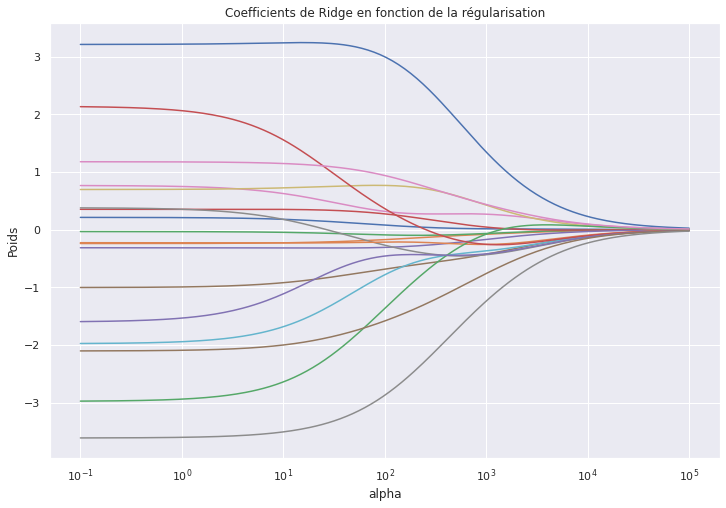

In [91]:
# Courbe d'évolution des poids et alpha
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Poids')
plt.title('Coefficients de Ridge en fonction de la régularisation')
plt.axis('tight')
plt.show()
# Les poids des différents paramètres en fonction de alpha 

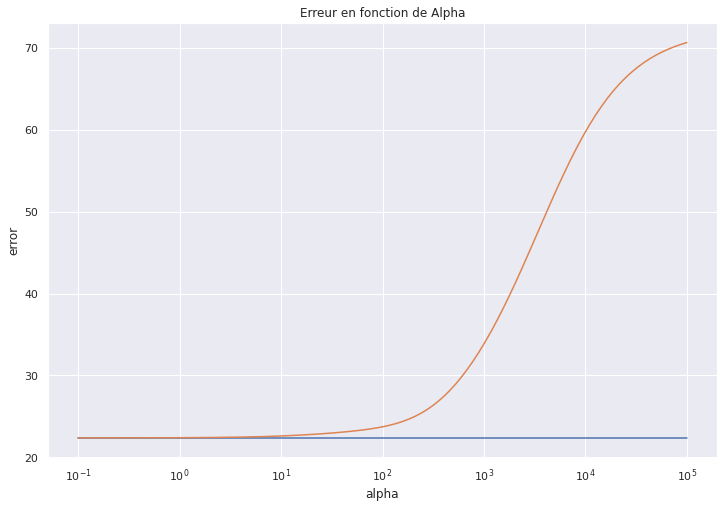

In [92]:
# Etude de l'erreur
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.title('Erreur en fonction de Alpha')
plt.show()

In [93]:
min(errors)

[22.355835084347905, 22.358464421128513]

In [114]:
# Utilisation de RidgeCV
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=alphas).fit(X_train, y_train)

print("Meilleur alpha: ", ridge_cv.alpha_)

Meilleur alpha:  9.115888299750818


In [95]:
# Utilisation des meilleurs paramètres pour les données d'apprentissage et de test

from sklearn.linear_model import Ridge
ridge_best = Ridge(alpha = ridge_cv.alpha_).fit(X_train, y_train)

pred_ridge = ridge_best.predict(X_test)         
rmse_ridge = (np.sqrt(mean_squared_error(y_test, pred_ridge)))  
print("Coefficients: ", ridge_best.coef_) 

Coefficients:  [ 0.18111795 -0.23007743 -0.04607659  0.35061199 -0.31818876 -0.92626084
  0.63503712  0.19100646  0.72151204 -1.70529397  3.23789637 -0.23109964
 -2.66633953  1.59440204 -1.14438832 -2.0083386   1.14847242 -3.51535138]


In [96]:
# Prédiction
y_pred_train = ridge_best.predict(X_train)
y_pred_test = ridge_best.predict(X_test)


R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

model_perf = {"Data": ['train', 'test'], 'R2': [R2_train, R2_test], 'RMSE': [RMSE_train, RMSE_test]}
model_perf = pd.DataFrame(model_perf, columns=["Data", "R2", "RMSE"])
model_perf

,Data,R2,RMSE
0,train,0.750335,4.705398
1,test,0.677622,4.751341


La norme ℓ2 du vecteur de poids peut être utilisée comme terme de régularisation de la régression linéaire.

Cela s'appelle la régularisation de Tykhonov, ou régression ridge.

La régression ridge admet toujours une solution analytique unique.

La régression ridge permet d'éviter le surapprentissage en restraignant l'amplitude des poids.

La régression ridge a un effet de sélection groupée : les variables corrélées ont le même coefficient.



# 4. La Régression LASSO

In [97]:
n_alphas = 20
alphas = np.logspace(-1, 5, n_alphas)
#alphas = np.arange(0.001, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

In [98]:
lasso.score(X_train, y_train), min(errors)

(-5.9174825133707065, [22.355835084347905, 519.1100797055229])

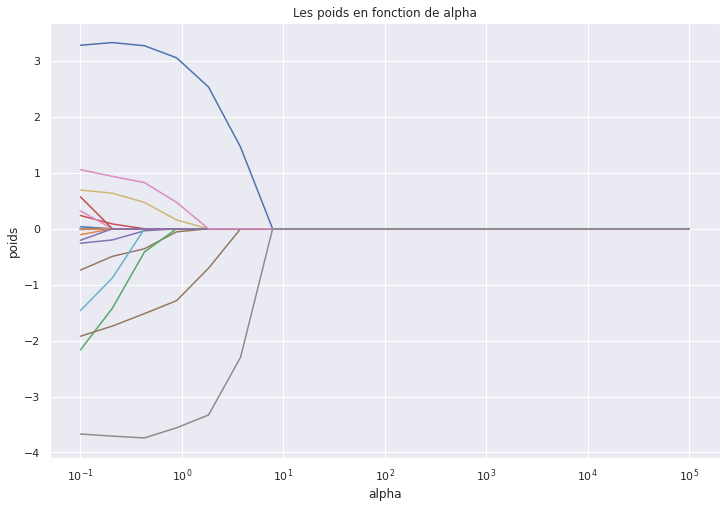

In [99]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.axis('tight')
plt.title('Les poids en fonction de alpha')

plt.show()

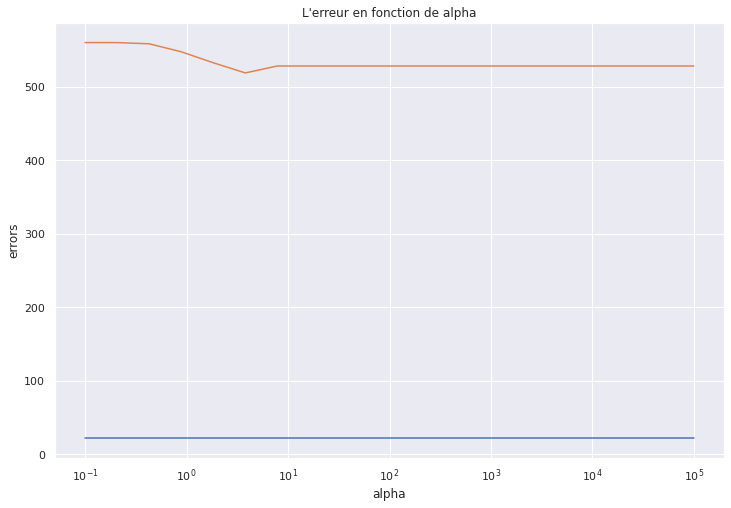

In [100]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('errors')
plt.axis('tight')
plt.title('L\'erreur en fonction de alpha')
plt.show()

In [ ]:
min(errors)

[22.355835084347888, 525.399704097607]

In [101]:
# Utilisation de LassoCV
from sklearn.linear_model import LassoCV

reg_lasso_cv = LassoCV(cv=5, alphas=alphas).fit(X_train, y_train)

In [102]:
reg_lasso_cv.alpha_

0.1

In [103]:
reg_lasso_cv.coef_

array([ 0.03599044, -0.1058935 , -0.        ,  0.23759924, -0.25879566,
       -0.73914414,  0.32088526, -0.        ,  0.69277601, -1.46325736,
        3.28196813, -0.01336633, -2.16788362,  0.57225722, -0.20615933,
       -1.92225451,  1.05641979, -3.67050012])

In [ ]:
reg_lasso_cv.get_params

<bound method BaseEstimator.get_params of LassoCV(alphas=array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)>

In [104]:
lasso_best = linear_model.Lasso(fit_intercept=False, alpha=reg_lasso_cv.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [106]:
# Prédiction
y_pred_train = lasso_best.predict(X_train)
y_pred_test = lasso_best.predict(X_test)

R2_train = lasso_best.score(X_train, y_train)
R2_test = lasso_best.score(X_test, y_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

model_perf = {"Data": ['train', 'test'], 'R2': [R2_train, R2_test], 'RMSE': [RMSE_train, RMSE_test]}
model_perf = pd.DataFrame(model_perf, columns=["Data", "R2", "RMSE"])
model_perf

,Data,R2,RMSE
0,train,-5.172720,23.396740
1,test,-7.002669,23.672855


Le lasso utilise la norme ℓ1 du vecteur β comme régularisateur pour obtenir un modèle parcimonieux.

Le lasso peut donc être utilisé comme un algorithme de réduction de dimension supervisée.

Le lasso n'a pas de solution explicite, ni nécessairement unique.

L'elastic net combine les normes ℓ1 et ℓ2 pour obtenir une solution moins parcimonieuse que le lasso, 
mais plus stable et dans laquelle toutes les variables corrélées pertinentes pour 
la prédiction de l'étiquette sont sélectionnées et reçoivent un poids identique.